<h1> 22-2 머신러닝 및 딥러닝 프로젝트</h1>
<right>2016110838 행정학전공 홍서이</right>

<h2>Import Necessary Libraries</h2>

In [407]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"


!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

# 공통 모듈 임포트
import numpy as np
import os
import pandas as pd


# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#머신러닝 모델
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm, tree
import xgboost
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

#모델 저장
import pickle

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [367]:
import warnings
warnings.filterwarnings('ignore')

<h2>Load dataset</h2>

In [368]:
from google.colab import drive
df = pd.read_csv("/content/drive/MyDrive/머신러닝 딥러닝/BC-TCGA/cancer_calssification.csv")

In [369]:
print("원본 데이터프레임의 shape:", df.shape)

원본 데이터프레임의 shape: (590, 17815)


In [370]:
df.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
0,0.610333,1.7550,0.403875,0.50325,-0.142167,-2.16950,0.136833,0.92325,-1.794625,0.2430,...,-0.24350,0.497833,0.8185,0.3025,1.29675,1.2892,-0.5119,-0.6990,-1.2582,1
1,0.055917,0.2450,0.337125,-0.41175,-0.550667,0.18475,-0.130000,-0.75300,-1.761750,0.8385,...,-0.30825,0.442833,0.5122,0.0720,-0.23900,-1.5816,0.3353,-0.6710,-0.7560,1
2,0.785583,1.1935,0.314375,0.41350,1.010333,-1.56675,-0.032833,0.20050,-2.331125,0.3570,...,0.03375,-2.050333,0.6220,0.5050,2.28600,0.7489,-0.9061,-0.9975,-2.0423,1
3,0.232667,0.0055,0.745750,0.29400,0.168833,-1.59375,-0.757667,-0.22975,-1.751250,0.6600,...,-0.06150,-0.783000,0.3127,0.5840,2.11200,-1.7819,0.1767,-0.5855,-0.0038,1
4,0.286917,1.1100,0.209750,-0.01525,0.813000,-1.89900,-0.470500,0.13575,0.225500,0.4495,...,-0.58900,-0.696667,0.2998,0.1775,2.38250,2.0968,-0.4367,2.3375,-1.0420,1


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Columns: 17815 entries, ELMO2 to label
dtypes: float64(17814), int64(1)
memory usage: 80.2 MB


In [372]:
df.describe()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,589.00000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.259592,0.833478,0.452664,0.053321,0.378982,-1.529667,-0.198501,0.077603,-0.403611,0.442859,...,-0.243666,-0.535855,0.239612,0.34367,2.081192,0.595468,0.032038,0.124982,-0.212182,0.896610
std,0.556094,0.830893,0.514285,0.614508,0.966953,1.080759,0.472994,0.494441,1.126378,0.411658,...,0.340626,0.866525,0.541019,0.68677,0.685738,1.797342,0.443948,1.497502,0.847745,0.304726
min,-1.718500,-1.412750,-1.025875,-1.726250,-2.284667,-5.026750,-1.737500,-1.511250,-2.807000,-1.200000,...,-2.050500,-2.710833,-1.923800,-2.84300,-0.748250,-3.713800,-1.500000,-2.528000,-2.151600,0.000000
25%,-0.115417,0.216188,0.105375,-0.355625,-0.297125,-2.199688,-0.467750,-0.245688,-1.406500,0.210125,...,-0.413250,-1.130833,-0.088150,-0.00500,1.702750,-0.795625,-0.276525,-0.857500,-0.825550,1.000000
50%,0.256750,0.836375,0.422000,0.107125,0.434667,-1.860375,-0.208250,0.086500,-0.217750,0.422750,...,-0.228750,-0.624583,0.243150,0.32400,2.144375,0.462200,0.005300,-0.399500,-0.274600,1.000000
75%,0.581437,1.422750,0.755031,0.462813,1.078750,-1.299250,0.093000,0.430750,0.430563,0.622375,...,-0.044312,-0.023375,0.591525,0.70900,2.569750,1.927925,0.271950,0.679250,0.318700,1.000000
max,2.901167,3.220250,2.522000,1.800500,3.825667,2.572500,1.361667,1.941750,2.381429,3.907000,...,1.221000,2.767667,2.315700,4.68950,3.989250,4.755900,1.862000,5.615000,2.364500,1.000000


In [373]:
df['label'].value_counts()

1    529
0     61
Name: label, dtype: int64

In [374]:
df.isnull().sum().sort_values(ascending=True)

ELMO2       0
SASH1       0
CDC14B      0
RLBP1L1     0
LDLRAP1     0
           ..
OR1J4      14
G30        14
ADAM5P     14
LHX5       16
LCE1B      17
Length: 17815, dtype: int64

Text(0.5, 1.0, 'Total Missing Value (%)')

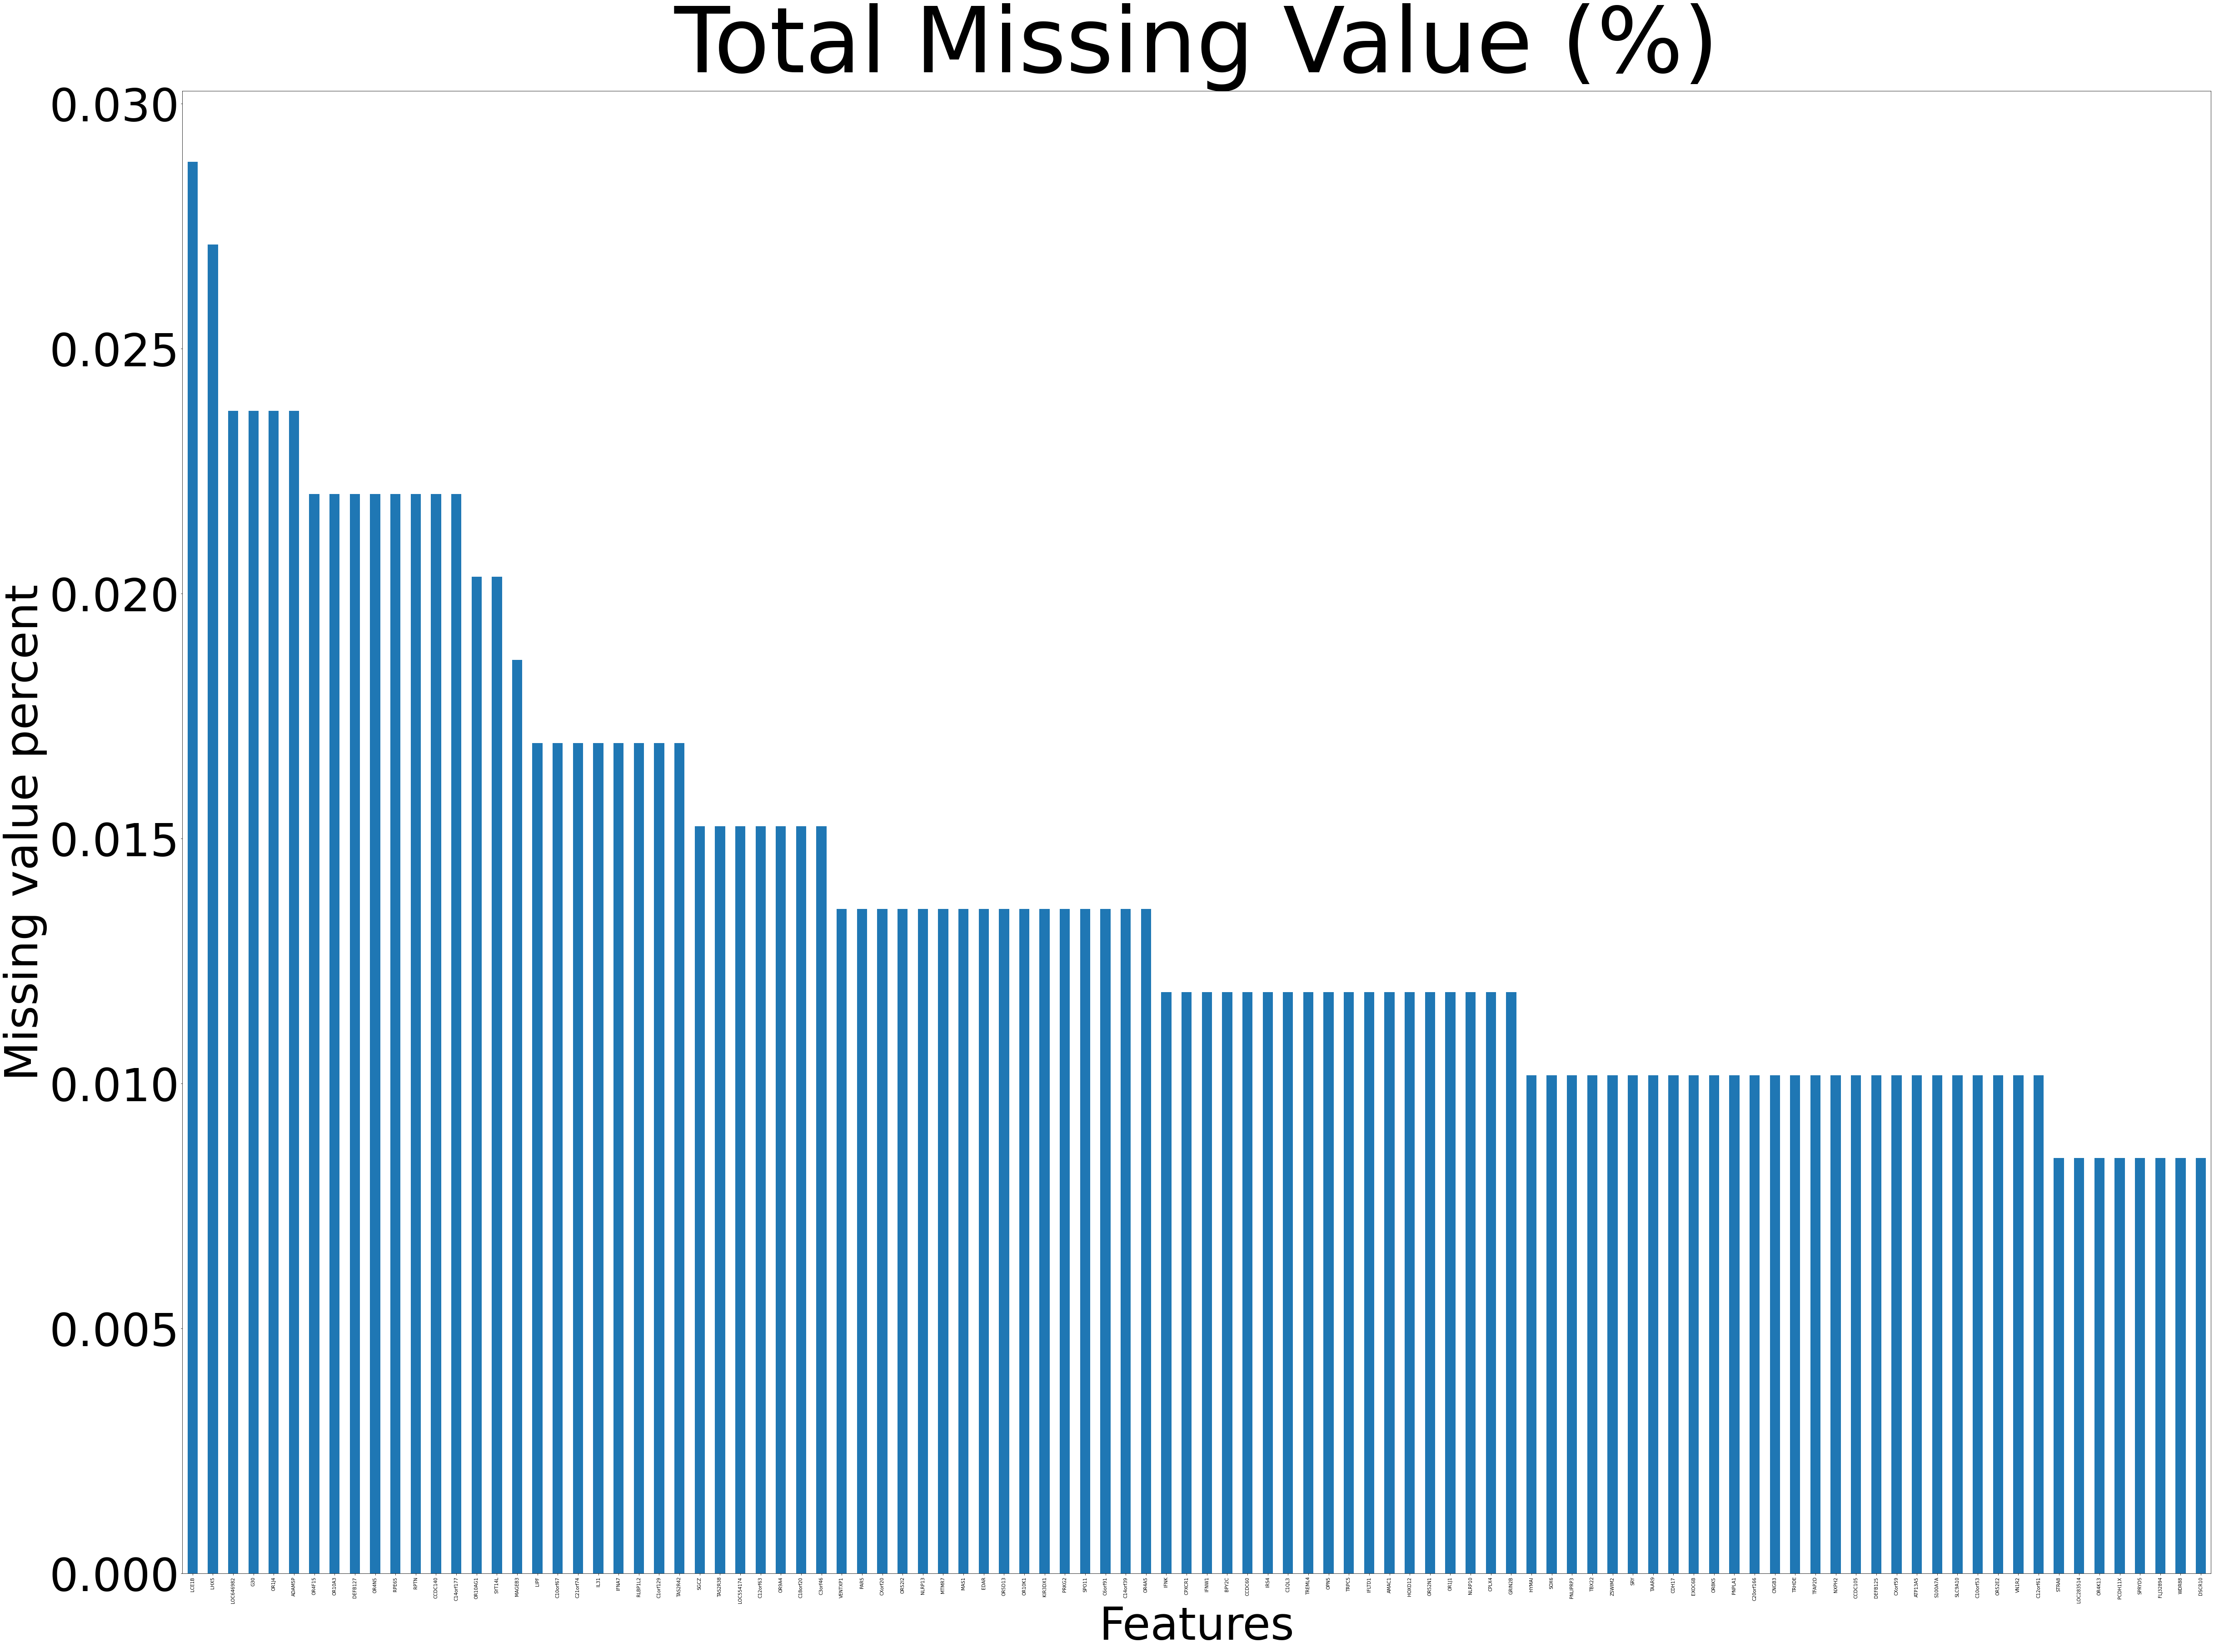

In [375]:
#결측치 유형 탐색
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(100)
percent_data.plot(kind="bar", figsize = (80,60))
plt.xticks(fontsize=10)
plt.yticks(fontsize=100)
plt.ylabel("Missing value percent", fontsize = 100)
plt.xlabel("Features", fontsize = 100)
plt.title("Total Missing Value (%)", fontsize = 200)

가장 높은 Missing Value percent가 0.03%이다.
hair et al.(2006)의 결측치 처리 가이드라인에 의하면 결측치 비율이 10%미만인경우 제거하거나 어떤 방법에 상관없이 imputation 한다고 하였다. 따라서 median값으로 imputation하는 방식으로 결측치를 제거하였다.

In [376]:
for c in df.columns:
    df[c].fillna(df[c].median(), inplace=True)


<h2>이상치 처리</h2>
데이터 입력 오류, 측정 오류, 실험 오류, 고의적 이상치, 표본추출 에러 등 다양한 원인에 의해 이상치가 존재할 수 있다.

이상치는 데이터 분석이나 통계 모델링의 결과에 심각한 영향을 미칠 수 있으므로 처리할 필요가 있다.

이상치 처리 방법에는 삭제, 대체, 변환 등 다양한 방식이 있다. 샘플 수가 적기 때문에 이상치를 삭제하는 방식은 수행하지 않았고, 대체 방식 중 scaling 방식을 선택하였다.

In [377]:
df['ELMO2'].skew()

0.3074750358266085

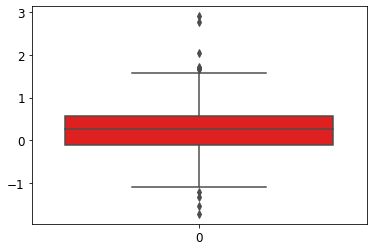

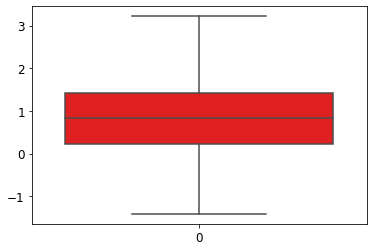

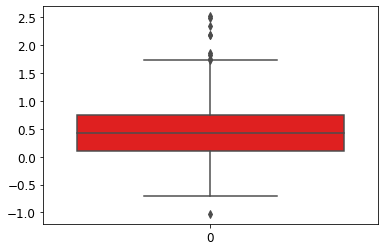

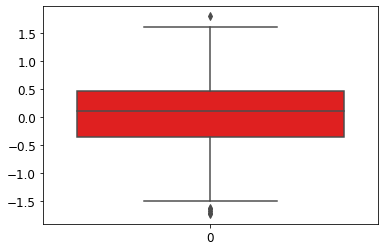

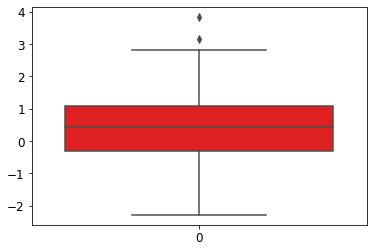

In [378]:
#이상치 확인
i=0
for c in df.columns:
  if (df[c].skew()>2):
    print(c)
  plt.figure(figsize=(6,4))
  sns.boxplot(data=df[c], color='red')
  plt.show()
  i += 1
  if i==5:
    break

In [379]:
#이상치 확인
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_range = Q1-(1.5*IQR)
upper_range = Q1+(1.5*IQR)


<h2>Dimension Reduction<h2>
<h3>Feature selection</h3>

feature의 수가 17815개나 되기 때문에 가장 자원을 덜 소모하는 filter based 방식을 선택하여 수행하였다.

<h2>테스트 세트 만들기</h2>

In [380]:
# 데이터셋 분리
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'label', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)


In [381]:
# 데이터 변환: scaling
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_scaled_train = standard_scaler.transform(X_train)
X_scaled_valid  = standard_scaler.transform(X_valid)
X_scaled_test  = standard_scaler.transform(X_test)


In [382]:
# target feature 포함한 train 데이터셋 생성
df_train = pd.concat([X_train, y_train],axis=1)
print(df_train.shape)
df_train.head()

(472, 17815)


,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
44,0.602917,-0.24275,0.313875,0.34500,-0.565000,-2.45650,0.146000,0.12600,0.77250,0.4125,...,-1.41775,-0.538167,0.8628,0.4150,2.86250,3.0570,0.1072,-1.0535,-1.8482,1
458,0.647250,1.89225,0.357625,-0.65525,0.105167,-2.04500,0.326500,-0.16400,-1.76025,0.4730,...,-0.20250,-0.472833,0.4756,0.0105,1.73650,2.9622,-0.2086,0.8020,-0.2456,1
401,0.592250,-0.42500,0.190875,1.15825,-2.055833,-2.74025,0.019000,-0.41500,-0.07050,0.3925,...,-0.68900,1.187000,0.6028,-0.5120,2.59125,0.1298,-0.0718,-0.4505,-1.5682,1
587,0.475833,-0.03800,0.358625,1.31975,-0.962333,-2.23100,-0.018667,-0.02400,0.59800,0.3830,...,0.11525,-0.865000,0.8152,-0.5630,2.19325,2.6014,0.0516,-0.5900,-0.5362,1
354,-0.301583,1.23150,0.542750,0.30425,1.153667,-1.54475,-0.246167,0.60375,0.26325,0.0115,...,-0.20400,0.336167,-0.1030,-0.0920,2.37875,0.4295,-0.2897,0.9695,-0.9639,1


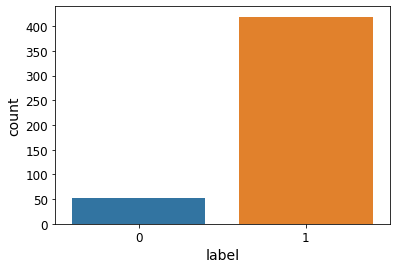

In [383]:
sns.countplot(x='label',data=df_train)

In [384]:
df_train['label'].value_counts(normalize=True)

1    0.887712
0    0.112288
Name: label, dtype: float64

In [385]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ELMO2,472.0,0.261093,0.573610,-1.718500,-0.114417,0.258417,0.595896,2.901167
CREB3L1,472.0,0.811671,0.823084,-1.412750,0.194562,0.818000,1.406813,3.087750
RPS11,472.0,0.452847,0.501452,-1.025875,0.113281,0.422000,0.764719,2.497500
PNMA1,472.0,0.066110,0.606817,-1.726250,-0.323813,0.110125,0.464125,1.800500
MMP2,472.0,0.393213,0.939454,-2.284667,-0.264583,0.449750,1.101333,3.158667
...,...,...,...,...,...,...,...,...
SLC39A6,472.0,0.560773,1.771379,-3.713800,-0.791475,0.431650,1.886875,4.755900
SNRPD2,472.0,0.023954,0.435915,-1.500000,-0.266100,0.003100,0.246375,1.799500
AQP7,472.0,0.129066,1.539245,-2.528000,-0.863625,-0.446000,0.672125,5.615000
CTSC,472.0,-0.222693,0.844911,-2.117900,-0.848575,-0.260250,0.309150,2.364500


<h2>>Feature extraction: PCA</h2>

In [386]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random


In [387]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1

In [388]:
d

338

In [389]:
pca = PCA(n_components=337)
pca.fit(X_scaled_train)
X_PCA_train = pca.transform(X_scaled_train)
X_PCA_valid = pca.transform(X_scaled_valid)
X_PCA_test  = pca.transform(X_scaled_test)

<h2>Build Models</h2>

다양한 Classifiers 을 이용하여 분류를 수행하였고 그 중 가장 성능이 좋은 모델을 선택하고자 하였다.

사용한 Classifiers는 아래와 같다.

* Logistic Regression
* Decision Tree
* Support Vector Machine
* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Random Forest
* K-Nearest Neighbors
* Naive Bayes

각 모델의 score는 아래의 종류로 계산하였다.

* precision score
* recall score
* F1 score
* support score
* accuracy score
* AUC/ROC

In [390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import time
import warnings
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
warnings.filterwarnings('ignore')

<h2>모델 훈련 및 trainset의 score 계산</h2>

<h2> Logiscic regression</h2>

In [391]:
LR = LogisticRegression()

LR.fit(X_PCA_train, y_train)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(LR, X_PCA_train, y_train, scoring=scoring, cv=splitter)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()


<h2>Decision Tree</h2>

In [392]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_PCA_train, y_train)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(decision_tree, X_PCA_train, y_train, scoring=scoring, cv=splitter)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

<h2>Support vector machine</h2>

In [393]:
SVM = SVC(probability = True)
SVM.fit(X_PCA_train, y_train)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(SVM, X_PCA_train, y_train, scoring=scoring, cv=splitter)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

<h2>Linear Discriminant Analysis</h2>

In [394]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_PCA_train, y_train)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(LDA, X_PCA_train, y_train, scoring=scoring, cv=splitter)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

<h2>Quadratic Discriminant Analysis</h2>

In [395]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_PCA_train, y_train)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(QDA, X_PCA_train, y_train, scoring=scoring, cv=splitter)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

<h2>Random Forest Classifier</h2>

In [396]:
random_forest = RandomForestClassifier()
random_forest.fit(X_PCA_train, y_train)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(random_forest, X_PCA_train, y_train, scoring=scoring, cv=splitter)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

<h2>K-Nearest Neighbors</h2>

In [397]:
KNN = KNeighborsClassifier()
KNN.fit(X_PCA_train, y_train)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(KNN, X_PCA_train, y_train, scoring=scoring, cv=splitter)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

<h2>Naive Bayes</h2>

In [398]:
bayes = GaussianNB()
bayes.fit(X_PCA_train, y_train)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(bayes, X_PCA_train, y_train, scoring=scoring, cv=splitter)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()


<h2>Trainset Score</h2>

In [399]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Logistic Regression,0.060037,0.007218,0.997872,0.991667,0.998810,0.997956,1.000000
2,Support Vector Machine,0.054832,0.008984,0.995745,0.990504,0.988810,0.995723,1.000000
6,K-Nearest Neighbors,0.001905,0.012841,0.995745,0.983333,0.997619,0.995912,0.998810
1,Decision Tree,0.021422,0.004898,0.987278,0.972755,0.966429,0.986926,0.966429
3,Linear Discriminant Analysis,0.136159,0.009425,0.925754,0.819801,0.949408,0.934353,0.980794
5,Random Forest,0.399916,0.026444,0.917376,0.907483,0.630000,0.893549,0.999524
4,Quadratic Discriminant Analysis,0.059647,0.009097,0.887766,0.443883,0.500000,0.835009,0.956280
7,Bayes,0.003595,0.006262,0.858156,0.706571,0.826580,0.875433,0.882631


<h2>Testset SCORE</h2>

In [400]:
pred_LR = LR.predict(X_PCA_valid)
pred_dt = decision_tree.predict(X_PCA_valid)
pred_svm = SVM.predict(X_PCA_valid)
pred_QDA = QDA.predict(X_PCA_valid)
pred_LDA = LDA.predict(X_PCA_valid)
pred_RF = random_forest.predict(X_PCA_valid)
pred_KNN = KNN.predict(X_PCA_valid)
pred_bayes = bayes.predict(X_PCA_valid)


In [401]:

models_valid = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy'    : [accuracy_score(y_valid, pred_LR), accuracy_score(y_valid, pred_dt),accuracy_score(y_valid, pred_svm),accuracy_score(y_valid, pred_LDA), accuracy_score(y_valid, pred_QDA), accuracy_score(y_valid, pred_RF), accuracy_score(y_valid, pred_KNN),accuracy_score(y_valid, pred_bayes)],
    'Precision'   : [precision_score(y_valid, pred_LR), precision_score(y_valid, pred_dt), precision_score(y_valid, pred_svm), precision_score(y_valid, pred_LDA), precision_score(y_valid, pred_QDA), precision_score(y_valid, pred_RF), precision_score(y_valid, pred_KNN), precision_score(y_valid, pred_bayes)],
    'Recall'      : [recall_score(y_valid, pred_LR), recall_score(y_valid, pred_dt), recall_score(y_valid, pred_svm), recall_score(y_valid, pred_LDA), recall_score(y_valid, pred_QDA), recall_score(y_valid, pred_RF), recall_score(y_valid, pred_KNN), recall_score(y_valid, pred_bayes)],
    'F1_score'    : [f1_score(y_valid, pred_LR),f1_score(y_valid, pred_dt),f1_score(y_valid, pred_svm), f1_score(y_valid, pred_LDA), f1_score(y_valid, pred_QDA), f1_score(y_valid, pred_RF), f1_score(y_valid, pred_KNN), f1_score(y_valid, pred_bayes)],
    'AUC_ROC'     : [roc_auc_score(y_valid, pred_LR), roc_auc_score(y_valid, pred_dt), roc_auc_score(y_valid, pred_svm), roc_auc_score(y_valid, pred_LDA), roc_auc_score(y_valid, pred_QDA), roc_auc_score(y_valid, pred_RF), roc_auc_score(y_valid, pred_KNN), roc_auc_score(y_valid, pred_bayes)],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

print("Testset Score")
models_valid.sort_values(by='Accuracy', ascending=False)

Testset Score


,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
6,K-Nearest Neighbors,0.966102,1.000000,0.962963,0.981132,0.981481
0,Logistic Regression,0.949153,0.963636,0.981481,0.972477,0.790741
2,Support Vector Machine,0.949153,0.963636,0.981481,0.972477,0.790741
3,Linear Discriminant Analysis,0.949153,0.963636,0.981481,0.972477,0.790741
5,Random Forest,0.949153,0.947368,1.000000,0.972973,0.700000
1,Decision Tree,0.932203,0.946429,0.981481,0.963636,0.690741
4,Quadratic Discriminant Analysis,0.915254,0.915254,1.000000,0.955752,0.500000
7,Bayes,0.355932,0.944444,0.314815,0.472222,0.557407


In [408]:
saved_model = pickle.dumps(KNN)

<h2>Ensemble Model</h2>

In [402]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [403]:
for model in models:
    scores = cross_validate(model, X_PCA_train, y_train, scoring=scoring, cv=20)

In [404]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_PCA_train, y_train)
pred = model_ens.predict(X_PCA_test)

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

In [405]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_PCA_train, y_train)
pred = model_ens.predict(X_PCA_test)
prob = model_ens.predict_proba(X_PCA_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [406]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensebling_hard,1.0,1.0,1.0,1.0,not applicable
1,Ensembling_soft,1.0,1.0,1.0,1.0,1.0
